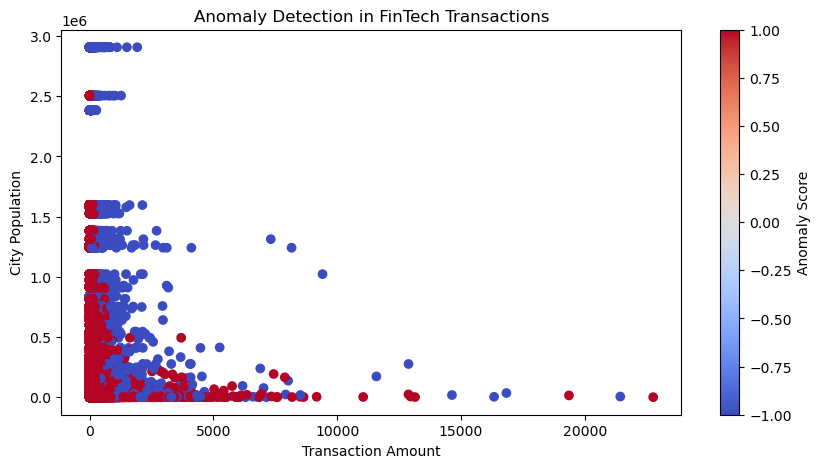

Detected 5558 fraudulent transactions.


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("fraudTest.csv")

# Select relevant features for security analysis
features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
df_filtered = df[features]

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Apply Isolation Forest for anomaly detection
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df["anomaly_score"] = model.fit_predict(df_scaled)

def detect_threats(df):
    """Identifies potential fraudulent transactions based on anomalies."""
    threats = df[df["anomaly_score"] == -1]
    return threats

# Run anomaly detection
anomalies = detect_threats(df)

# Visualize anomalies
plt.figure(figsize=(10, 5))
plt.scatter(df['amt'], df['city_pop'], c=df['anomaly_score'], cmap='coolwarm')
plt.xlabel('Transaction Amount')
plt.ylabel('City Population')
plt.title('Anomaly Detection in FinTech Transactions')
plt.colorbar(label='Anomaly Score')
plt.show()

# Print detected threats
print(f"Detected {len(anomalies)} fraudulent transactions.")



In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("fraudTest.csv")
print(df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

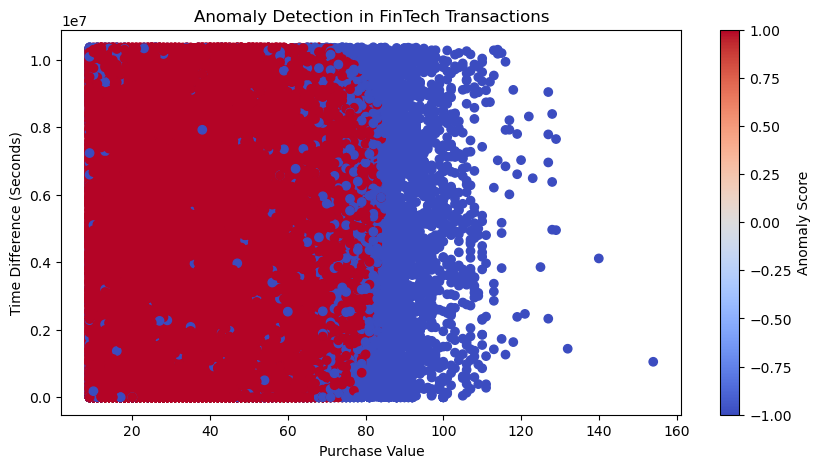

Detected 7556 fraudulent transactions.


In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime

# Load dataset
df = pd.read_csv("Fraud_Data.csv")

# Convert time columns to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Feature Engineering: Calculate time difference between signup and purchase
df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

# Select relevant features
features = ['purchase_value', 'age', 'time_diff']
df_filtered = df[features]

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Apply Isolation Forest for anomaly detection
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df["anomaly_score"] = model.fit_predict(df_scaled)

def detect_threats(df):
    """Identifies potential fraudulent transactions based on anomalies."""
    threats = df[df["anomaly_score"] == -1]
    return threats

# Run anomaly detection
anomalies = detect_threats(df)

# Visualize anomalies
plt.figure(figsize=(10, 5))
plt.scatter(df['purchase_value'], df['time_diff'], c=df['anomaly_score'], cmap='coolwarm')
plt.xlabel('Purchase Value')
plt.ylabel('Time Difference (Seconds)')
plt.title('Anomaly Detection in FinTech Transactions')
plt.colorbar(label='Anomaly Score')
plt.show()

# Print detected threats
print(f"Detected {len(anomalies)} fraudulent transactions.")


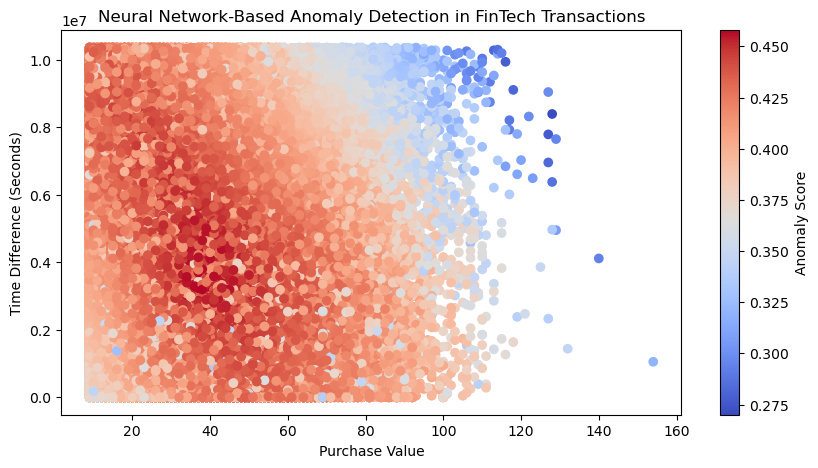

Detected 0 fraudulent transactions.


In [6]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load dataset
df = pd.read_csv("Fraud_Data.csv")

# Convert time columns to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Feature Engineering: Calculate time difference between signup and purchase
df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

# Select relevant features
features = ['purchase_value', 'age', 'time_diff']
df_filtered = df[features]

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Convert data to tensors
X = torch.tensor(df_scaled, dtype=torch.float32)

def detect_threats_nn(X):
    """Neural network for anomaly detection."""
    class FraudDetectionNN(nn.Module):
        def __init__(self):
            super(FraudDetectionNN, self).__init__()
            self.fc1 = nn.Linear(X.shape[1], 64)
            self.fc2 = nn.Linear(64, 32)
            self.fc3 = nn.Linear(32, 1)
            self.sigmoid = nn.Sigmoid()
        
        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            return x

    model = FraudDetectionNN()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()
    
    # Generate synthetic labels for unsupervised learning
    labels = torch.zeros(X.shape[0], 1)
    
    for epoch in range(10):  # Short training cycle
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    scores = outputs.detach().numpy()
    return scores

# Run anomaly detection
anomaly_scores = detect_threats_nn(X)
df["anomaly_score"] = anomaly_scores

# Visualize anomalies
plt.figure(figsize=(10, 5))
plt.scatter(df['purchase_value'], df['time_diff'], c=df['anomaly_score'], cmap='coolwarm')
plt.xlabel('Purchase Value')
plt.ylabel('Time Difference (Seconds)')
plt.title('Neural Network-Based Anomaly Detection in FinTech Transactions')
plt.colorbar(label='Anomaly Score')
plt.show()

# Print detected threats
print(f"Detected {np.sum(anomaly_scores > 0.5)} fraudulent transactions.")


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load the dataset
df = pd.read_csv("Fraud_Data.csv")

# Preprocess data
def preprocess_data(df):
    df['signup_time'] = pd.to_datetime(df['signup_time'])
    df['purchase_time'] = pd.to_datetime(df['purchase_time'])
    df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()
    
    df = df.drop(columns=['signup_time', 'purchase_time', 'user_id'])
    
    categorical_cols = ['source', 'browser', 'sex']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    scaler = StandardScaler()
    df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
    
    return df

# Apply preprocessing
df = preprocess_data(df)
X = df.drop(columns=['class'])
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 8

input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder on non-fraudulent transactions
X_train_normal = X_train[y_train == 0]
autoencoder.fit(X_train_normal, X_train_normal, epochs=20, batch_size=32, shuffle=True, validation_split=0.1)

# Compute reconstruction error
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Set threshold for anomaly detection
threshold = np.percentile(mse, 95)
y_pred = (mse > threshold).astype(int)

# Evaluate the model
auc = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc}")
print(f"Detected {sum(y_pred)} fraudulent transactions out of {len(y_test)}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

# Load the dataset
df = pd.read_csv("Fraud_Data.csv")

# Preprocess data
def preprocess_data(df):
    df['signup_time'] = pd.to_datetime(df['signup_time'])
    df['purchase_time'] = pd.to_datetime(df['purchase_time'])
    df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()
    
    df = df.drop(columns=['signup_time', 'purchase_time', 'user_id'])
    
    categorical_cols = ['source', 'browser', 'sex']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    scaler = StandardScaler()
    df[df.columns.difference(['class'])] = scaler.fit_transform(df[df.columns.difference(['class'])])
    
    return df

# Apply preprocessing
df = preprocess_data(df)
X = df.drop(columns=['class'])
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 8

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

# Train autoencoder on non-fraudulent transactions
X_train_normal = X_train[y_train == 0]
autoencoder.fit(X_train_normal, X_train_normal, epochs=20, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)

# Compute reconstruction error
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Set threshold for anomaly detection
threshold = np.percentile(mse, 95)
y_pred = (mse > threshold).astype(int)

# Evaluate the model
auc = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc}")
print(f"Detected {sum(y_pred)} fraudulent transactions out of {len(y_test)}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

# Load the dataset
df = pd.read_csv("Fraud_Data.csv")

# Preprocess data
def preprocess_data(df):
    df['signup_time'] = pd.to_datetime(df['signup_time'])
    df['purchase_time'] = pd.to_datetime(df['purchase_time'])
    df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()
    
    df = df.drop(columns=['signup_time', 'purchase_time', 'user_id'])
    
    categorical_cols = ['source', 'browser', 'sex']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    scaler = StandardScaler()
    df[df.columns.difference(['class'])] = scaler.fit_transform(df[df.columns.difference(['class'])])
    
    return df

# Apply preprocessing
df = preprocess_data(df)
X = df.drop(columns=['class'])
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 8

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

# Train autoencoder on non-fraudulent transactions
X_train_normal = X_train[y_train == 0]
autoencoder.fit(X_train_normal, X_train_normal, epochs=20, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)

# Compute reconstruction error
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Set threshold for anomaly detection
threshold = np.percentile(mse, 95)
y_pred = (mse > threshold).astype(int)

# Evaluate the model
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"AUC Score: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Detected {sum(y_pred)} fraudulent transactions out of {len(y_test)}")


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("fraudTest.csv")

# Select relevant features for security analysis
features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
df_filtered = df[features]

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Define autoencoder model
input_dim = df_scaled.shape[1]
encoding_dim = 4  # Compressed representation

input_layer = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = keras.models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(df_scaled, df_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)

# Compute reconstruction error
reconstructed = autoencoder.predict(df_scaled)
mse = np.mean(np.power(df_scaled - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 99)  # Set threshold for anomaly detection

df['anomaly_score'] = (mse > threshold).astype(int)  # 1 = anomaly, 0 = normal

def detect_threats(df):
    """Identifies potential fraudulent transactions based on anomalies."""
    threats = df[df['anomaly_score'] == 1]
    return threats

# Run anomaly detection
anomalies = detect_threats(df)

# Visualize anomalies
plt.figure(figsize=(10, 5))
plt.scatter(df['amt'], df['city_pop'], c=df['anomaly_score'], cmap='coolwarm')
plt.xlabel('Transaction Amount')
plt.ylabel('City Population')
plt.title('Anomaly Detection in FinTech Transactions')
plt.colorbar(label='Anomaly Score')
plt.show()

# Print detected threats
print(f"Detected {len(anomalies)} fraudulent transactions.")


In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime

# Load dataset
df = pd.read_csv("Fraud_Data.csv")

# Convert time columns to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Feature Engineering: Calculate time difference between signup and purchase
df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

# Select relevant features
features = ['purchase_value', 'age', 'time_diff']
df_filtered = df[features]

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Prepare data for XGBoost
dmatrix = xgb.DMatrix(df_scaled)

# Train XGBoost model for anomaly detection
params = {
    "objective": "reg:squarederror",  # Regression error
    "max_depth": 3,
    "learning_rate": 0.1,
    "n_estimators": 100,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
}

model = xgb.train(params, dmatrix, num_boost_round=100)

# Compute anomaly scores
df['anomaly_score'] = model.predict(dmatrix)
threshold = np.percentile(df['anomaly_score'], 5)  # 5% lowest scores as anomalies
df['is_anomaly'] = (df['anomaly_score'] < threshold).astype(int)

def detect_threats(df):
    """Identifies potential fraudulent transactions based on anomalies."""
    threats = df[df['is_anomaly'] == 1]
    return threats

# Run anomaly detection
anomalies = detect_threats(df)

# Visualize anomalies
plt.figure(figsize=(10, 5))
plt.scatter(df['purchase_value'], df['time_diff'], c=df['is_anomaly'], cmap='coolwarm')
plt.xlabel('Purchase Value')
plt.ylabel('Time Difference (Seconds)')
plt.title('Anomaly Detection in FinTech Transactions')
plt.colorbar(label='Anomaly Score')
plt.show()

# Print detected threats
print(f"Detected {len(anomalies)} fraudulent transactions.")

/Users/nazgul/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[17:21:11] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.



XGBoostError: [17:21:11] /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:43: Check failed: info.labels.Shape(0) == info.num_row_ (0 vs. 151112) : Invalid shape of labels.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001a4fe49b4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x00000001a5185e0d xgboost::obj::(anonymous namespace)::CheckInitInputs(xgboost::MetaInfo const&) + 237
  [bt] (2) 3   libxgboost.dylib                    0x00000001a5185a04 xgboost::obj::(anonymous namespace)::CheckRegInputs(xgboost::MetaInfo const&, xgboost::HostDeviceVector<float> const&) + 36
  [bt] (3) 4   libxgboost.dylib                    0x00000001a5184f23 xgboost::obj::RegLossObj<xgboost::obj::LinearSquareLoss>::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*) + 51
  [bt] (4) 5   libxgboost.dylib                    0x00000001a5111d39 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 665
  [bt] (5) 6   libxgboost.dylib                    0x00000001a500071a XGBoosterUpdateOneIter + 154
  [bt] (6) 7   libffi.8.dylib                      0x000000010e514972 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x000000030a8df210 0x0 + 13061976592

